In [1]:
# Import required modules
import pandas as pd
from src.preprocessing import load_and_parse_reuters

%load_ext autoreload
%autoreload 2

In [2]:
# Paths
tar_path = "data/raw/reuters_8.5M_titles.tar.bz2"
csv_path = "data/processed/reuters.csv"

In [3]:
# Load or parse the Reuters dataset
# If the CSV already exists, it will be loaded directly.
df_reuters = load_and_parse_reuters(tar_path=tar_path, save_path=csv_path)

Extracting data/raw/reuters_8.5M_titles.tar.bz2
Found 3514 TSV files.


Reading TSV files: 100%|██████████| 3514/3514 [00:40<00:00, 86.51it/s] 


Parsing timestamps...


100%|██████████| 8556325/8556325 [14:53<00:00, 9580.58it/s] 


Processed CSV saved to data/processed/reuters.csv


In [4]:
# Quick overview of the dataset
print("Number of articles:", len(df_reuters))
print("Columns:", df_reuters.columns.tolist())
df_reuters.head()

Number of articles: 8556325
Columns: ['ts', 'title', 'href', 'ts_parsed']


,ts,title,href,ts_parsed
0,20070101 12:46 AM EST,Kylie sees in 2007 with UK concert,http://www.reuters.com/news/video/videoStory?s...,2007-01-01 05:46:00+00:00
1,20070101 12:59 AM EST,Thailand says Thaksin backers may be behind bl...,http://www.reuters.com/article/worldNews/idUSB...,2007-01-01 05:59:00+00:00
2,20070101 01:09 AM EST,Somali government vows to pursue fleeing Islam...,http://www.reuters.com/article/worldNews/idUSL...,2007-01-01 06:09:00+00:00
3,20070101 01:29 AM EST,"Japan TV apologizes for ""topless"" New Year's E...",http://www.reuters.com/article/entertainmentNe...,2007-01-01 06:29:00+00:00
4,20070101 02:09 AM EST,Hundreds hurt in New Year revelry in Philippines,http://www.reuters.com/article/worldNews/idUSS...,2007-01-01 07:09:00+00:00


In [5]:
# Check timestamp coverage
print("Earliest timestamp:", df_reuters["ts_parsed"].min())
print("Latest timestamp:", df_reuters["ts_parsed"].max())

Earliest timestamp: 2007-01-01 05:46:00+00:00
Latest timestamp: 2016-08-16 23:59:00+00:00


<Axes: title={'center': 'Number of articles per year'}, xlabel='year'>

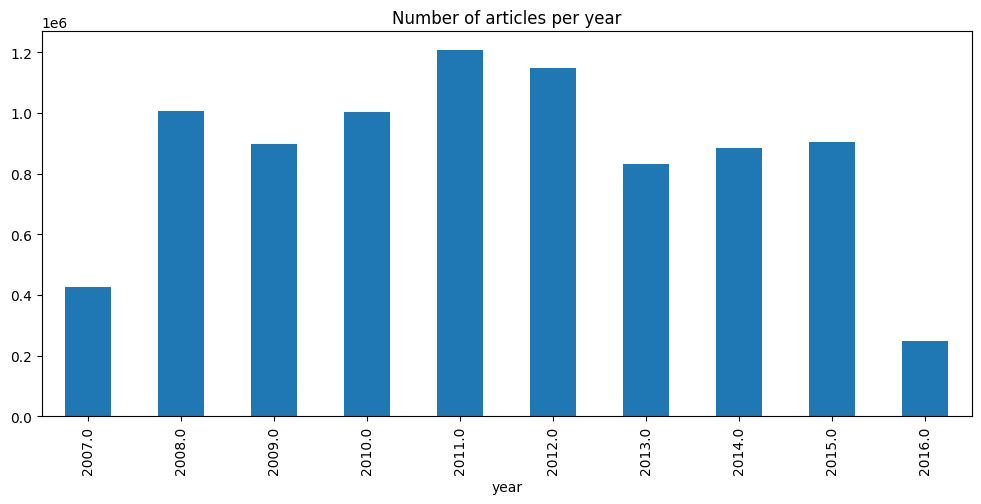

In [6]:
# Example: number of articles per year
df_reuters["year"] = df_reuters["ts_parsed"].dt.year
articles_per_year = df_reuters.groupby("year").size()
articles_per_year.plot(kind="bar", figsize=(12,5), title="Number of articles per year")